Gaisser:

$\mu(E_\mu,X) = \int_0^X P_\mu(E_\mu,X) dX$

$P_\mu(E,X) = \frac{\epsilon_\pi}{X\cos{\theta}(1-r_\pi)} \int_{E_\mu}^{E_\mu/r_\pi} \frac{\Pi(E,X)}{E} \frac{dE}{E} + \frac{0.635\epsilon_K}{X\cos{\theta}(1-r_K)} \int_{E_\mu}^{E_\mu/r_K} \frac{K(E,X)}{E} \frac{dE}{E}$

$\Pi(E,X) = e^{-(X/\Lambda_\pi)} \frac{Z_{N\pi}}{\lambda_N} N_0(E) \int_0^X (\frac{X'}{X})^{\epsilon_\pi/E\cos{\theta}} \exp{(\frac{X'}{\Lambda_\pi} - \frac{X'}{\Lambda_N})dX'}$, and similar for $K(E,X)$

$K(E,X) = e^{-(X/\Lambda_K)} \frac{Z_{NK}}{\lambda_N} N_0(E) \int_0^X (\frac{X'}{X})^{\epsilon_K/E\cos{\theta}} \exp{(\frac{X'}{\Lambda_K} - \frac{X'}{\Lambda_N})dX'}$

$\epsilon_{\mu^\pm}=1,\ \epsilon_{\pi^\pm}=115,\ \epsilon_{K^\pm}=850$ (GeV, Table 3.1)

$Z_{pp}=0.263,\ Z_{p\pi^+}=0.046,\ Z_{p\pi^-}=0.033,\ Z_{pK^+}=0.0090,\ Z_{pK^-}=0.0028$ (Table 5.2)

$\Lambda_N=120,\ \Lambda_\pi=160,\ \Lambda_K=180$ (g/cm^2, Table 3.2)

$\Lambda_i = \lambda_i (1-Z_{ii})^{-1} \Rightarrow \lambda_p=151.56$ g/cm^2

$N_0(E) = 1.8\times 10^4 E^{-2.7}$ nuc cm^-2 s^-1 sr^-1 GeV^-1

$r_\pi=(m_\mu/m_\pi)^2=0.5731 ,\ r_K=(m_\mu/m_K)^2=0.0458$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline

#define constants
Lamb_pi = 160.
Lamb_K = 180.
Lamb_N = 120.
Z_Npi = 0.046
Z_NK = 0.009
lamb_N = 152.
eps_mu = 1.
eps_pi = 115.
eps_K = 850.
r_pi = 0.5731
r_K = 0.0458

#define Energy and Atmospheric depth ranges
E = 10**(np.arange(0,8.25,0.25)/4) # GeV
X = np.linspace(0,1030,100) # g cm^-2

In [2]:
#calcuate nucleon flux N(E,X)

N = np.zeros((len(E),len(X)))
for i,j in np.ndindex(N.shape):
    N[i,j] = 1.8e4 * np.exp(-X[j]/120) * E[i]**(-2.7)

$\Pi(E,X) = e^{-(X/\Lambda_\pi)} \frac{Z_{N\pi}}{\lambda_N} N_0(E) \int_0^X (\frac{X'}{X})^{\epsilon_\pi/E\cos{\theta}} \exp{(\frac{X'}{\Lambda_\pi} - \frac{X'}{\Lambda_N})dX'}$, and similar for $K(E,X)$

$K(E,X) = e^{-(X/\Lambda_K)} \frac{Z_{NK}}{\lambda_N} N_0(E) \int_0^X (\frac{X'}{X})^{\epsilon_K/E\cos{\theta}} \exp{(\frac{X'}{\Lambda_K} - \frac{X'}{\Lambda_N})dX'}$

In [3]:
#calculate pion and kaon flux Pi(E,X), K(E,X)

Pi = np.zeros((len(E),len(X)))
K = np.zeros((len(E),len(X)))

def Pi_integrand(x, energy, depth):
    return (x/depth)**(eps_pi/energy) * np.exp(x/Lamb_pi - x/Lamb_N)
def K_integrand(x, energy, depth):
    return (x/depth)**(eps_K/energy) * np.exp(x/Lamb_K - x/Lamb_N)

for i,j in np.ndindex(N.shape):
    Pi[i,j] = np.exp(-X[j]/Lamb_pi) * Z_Npi/lamb_N * 1.8e4*E[i]**(-2.7) * quad(Pi_integrand, 0, X[j], args=(E[i],X[j]))[0]
    K[i,j] = np.exp(-X[j]/Lamb_K) * Z_NK/lamb_N * 1.8e4*E[i]**(-2.7) * quad(K_integrand, 0, X[j], args=(E[i],X[j]))[0]

C:\Users\tgrosson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\Users\tgrosson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  if sys.path[0] == '':
C:\Users\tgrosson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\tgrosson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  del sys.path[0]


$P_\mu(E,X) = \frac{\epsilon_\pi}{X\cos{\theta}(1-r_\pi)} \int_{E_\mu}^{E_\mu/r_\pi} \frac{\Pi(E,X)}{E} \frac{dE}{E} + \frac{0.635\epsilon_K}{X\cos{\theta}(1-r_K)} \int_{E_\mu}^{E_\mu/r_K} \frac{K(E,X)}{E} \frac{dE}{E}$

In [4]:
#calculate muon production spectrum P_mu(E,X)

P_mu = np.zeros((len(E),len(X)))
for j in range(len(X)):
    c_pi = eps_pi/(X[j]*(1-r_pi))
    c_K = 0.635*eps_K/(X[j]*(1-r_K))
    
    intp_pi = InterpolatedUnivariateSpline(E, Pi[:,j]/E**2, k=1)
    intp_K = InterpolatedUnivariateSpline(E, K[:,j]/E**2, k=1)
    
    for i in range(len(E)):
        int_pi = intp_pi.integral(E[i], E[i]/r_pi)
        int_K = intp_K.integral(E[i], E[i]/r_K)
        
        P_mu[i,j] = c_pi*int_pi + c_K*int_K

C:\Users\tgrosson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\tgrosson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


From Lipari Eq 56, muon energy loss term:

$p_{surv}(E,X,X_0,\theta) = \exp{(-\frac{m_\mu}{c\tau_\mu} \int_{X_0}^{X_f} \frac{dX}{E(X-X_0,E_0)\rho(X,\theta)})}$

air density $\rho(X,\theta)$ is just $X/6.334$ for our purposes

$\frac{m_\mu}{c\tau_\mu} = 1.603\times 10^{-6}$ GeV cm^-1

Approximating energy loss as $E(X-X_0,E_0) \approx E_0 - 1.82\times 10^{-3} (X-X_0)$ (GeV, X in g cm^-2, MIP in air)

$\Rightarrow p_{surv}(E,X_f,X_0) = \exp{(-6.334*1.603\times 10^{-6} \int_{X_0}^{X_f} \frac{dX}{X (E_0 - 0.00182(X-X_0))})}$

In [5]:
#calculate probability of observing a muon given energy loss p_surv(E,X,X0)

p_surv = np.zeros((len(E),len(X),len(X)))
for i,j in np.ndindex(N.shape):
    for k in range(j+1):
        integrand = 1 / (X[k:j+1] * (E[i] - 0.00182*(X[k:j+1]-X[k])))
        p_surv[i,j,k] = np.exp(-6.334*1.603e-6 * np.trapz(integrand, x=X[k:j+1]))

C:\Users\tgrosson\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


integrate over muon decay, production, and energy loss

$\mu(E_\mu,X) = \int_0^X (\frac{X'}{X})^{\epsilon_\mu/E}\ P_\mu(E_\mu,X')\ p_{surv}(E_\mu,X,X')\ dX'$

In [11]:
#calculate muon flux mu(E,X)

mu = np.zeros((len(E),len(X)))
for i,j in np.ndindex(N.shape):
    integrand = (X[1:j+1]/X[j])**(eps_mu/E[i]) * P_mu[i,1:j+1] * p_surv[i,j,1:j+1]
    mu[i,j] = np.trapz(integrand, x=X[1:j+1])

In [7]:
#function to convert atmospheric depth to altitude (Gaisser Eq 3.22)

def X2h(X):
    if X<=25:
        return 47.05 + 6.9*np.log(X) + 0.299*np.log(X/10)**2
    elif X>25 and X<=230:
        return 45.5 - 6.34*np.log(X)
    return 44.34 - 11.861*X**0.19

def h2X(h):
    if h>=X2h(25):
        return np.exp(0.000083612 * (3.6056*np.sqrt(36800000*h - 851191923) - 110461))
    elif h<X2h(230) and h>=X2h(25):
        return np.exp((45.5-h)/6.34)
    return ((44.34-h)/11.861)**(1/0.19)

Text(0.5, 0, 'Altitude (km)')

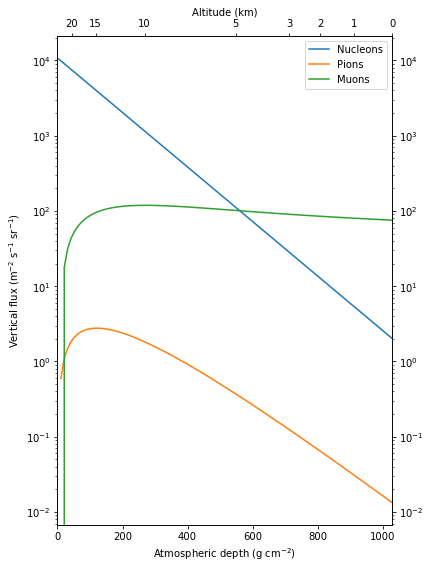

In [12]:
#plot them

N_flux = np.trapz(N,E,axis=0)
Pi_flux = np.trapz(Pi,E,axis=0)
K_flux = np.trapz(K,E,axis=0)
mu_flux = np.trapz(mu,E,axis=0)

plt.figure(figsize=(6,9))
plt.plot(X, N_flux, label='Nucleons')
plt.plot(X ,Pi_flux, label='Pions')
# plt.plot(X, K_flux, label='')
plt.plot(X, mu_flux, label='Muons')
plt.yscale('log')
plt.tick_params(which='both',right=True,labelright=True)
plt.legend()
plt.xlabel(r'Atmospheric depth (g cm$^{-2}$)')
plt.ylabel(r'Vertical flux (m$^{-2}$ s$^{-1}$ sr$^{-1}$)')
plt.xlim(0,1030)

ax1 = plt.gca()
ax2 = ax1.twiny()
newlocs = [h2X(20),h2X(15),h2X(10),h2X(5),h2X(3),h2X(2),h2X(1),h2X(0)]
newlabs = [20,15,10,5,3,2,1,0]
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(newlocs)
ax2.set_xticklabels(newlabs)
ax2.set_xlabel('Altitude (km)')